# 4.4.3. [As Unsupervised Problem](https://courses.thinkful.com/data-201v1/project/4.4.3)

## Drill: tf-idf scores

Converting sentences into numeric vectors is fundamental for a lot of unsupervised NLP tasks.  To make sure you are solid on how these vectors work, please generate the vectors for the last three sentences.  If you are feeling uncertain, have your mentor walk you through it.



term document matrix for the 6 sentences

|           | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------|---|---|---|---|---|---|
| Monty     | 1 | 0 | 0 | 1 | 0 | 0 |
| Python    | 1 | 1 | 0 | 1 | 0 | 0 |
| sketch    | 1 | 1 | 0 | 0 | 0 | 0 |
| laugh     | 1 | 1 | 0 | 1 | 0 | 0 |
| funny     | 0 | 3 | 0 | 1 | 0 | 0 |
| best      | 1 | 1 | 1 | 0 | 1 | 0 |
| ice cream | 0 | 0 | 1 | 0 | 1 | 1 |
| dessert   | 0 | 0 | 1 | 0 | 1 | 0 |
| taste     | 0 | 0 | 1 | 0 | 1 | 2 |


4. "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing."
5. "I would rather put strawberries on my ice cream for dessert, they have the best taste."
6. "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."

|           |df |cf| idf |
|-----------|---|---|---|
| Monty     | 2 | 2 | 1.585 |
| Python    | 3 | 3 | 1 |
| sketch    | 2 | 2 | 1.585 |
| laugh     | 3 | 3 | 1 |
| funny     | 2 | 4 | 1.585 |
| best      | 4 | 4 | .585 |
| ice cream | 3 | 3 | 1 |
| dessert   | 2 | 2 | 1.585 |
| taste     | 3 | 4 | 1 |

**Represent each sentence as a vectorf made up of tf-idf scores for each word**:

|           | idf | 4 | 5 | 6 |
|-----------|---|---|---|---|
| Monty     | 1.585 | 1.585 | 0 | 0 |
| Python    | 1 | 1 | 0 | 0 |
| sketch    | 1.585 | 0 | 0 | 0 |
| laugh     | 1 | 1 | 0 | 0 |
| funny     | 1.585 | 1.585 | 0 | 0 |
| best      | .585 | 0 | 0.585 | 0 |
| ice cream | 1 | 0 | 1 | 1 |
| dessert   | 1.585 | 0 | 1.585 | 0 |
| taste     | 1 | 0 | 1 | 2 |



$$tf-idf_{t,d}=(tf_{t,d})(idf_t)$$



# Drill 0: Test set

Now it's your turn: Apply our LSA model to the test set.  
Does it identify similar sentences for components 0 through 4? 


#### So the Oh ! and the Ah clusters popped up again. In the test set there seemed to be components focusing on Mr. and Mrs Weston and a section where each paragraph started with 'Yes,' 

In [11]:

#Reshapes the vectorizer output into something people can read for test set
X_test_tfidf_csr = X_test_tfidf.tocsr()

#number of paragraphs for test set
n = X_test_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_test_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_test_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, 
# so a tf-idf score of 0 indicates that the word was 
# present once in that sentence.
print('Original sentence:', X_test[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
Tf_idf vector: {'resolving': 0.3424390305045805, 'unexceptionable': 0.3196409792117937, 'assure': 0.267729777836069, 'friends': 0.2515333740641343, 'quite': 0.1916471918420347, 'replied': 0.20315405638674577, 'watch': 0.62300800500314, 'elton': 0.16874782424809767, 'pass': 0.28445227585106625, 'really': 0.21963852817625326, 'mrs': 0.14780961753993585}


In [13]:
# Remember, you will use the same model, only with the test set data.  Don't fit a new model by mistake!
#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 49.39222593913456
Component 0:
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
" Oh !    0.999921
Name: 0, dtype: float64
Component 1:
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                             0.617142
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse to cards .                                                                                                                                                                 

_______

In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Comparing paragraphs within Emma by Jane Austen using LSA

In [7]:
#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
nlp = spacy.load('en')
alice_doc = nlp(alice)

#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package gutenberg to /Users/edise/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


# Drill 1: Tweaking tf-idf

Go back up to the code where we originally translated the text from words to numbers.  
* There are a lot of decision-points: stop list, thresholds for inclusion
* Could integrate spaCy to incorporate named entities/lemmas We also didn't integrate spaCy

Change things up a few times and see how that affects the results of the LSA.  
Write up your observations and share them with your mentor.

Going to see what happens when 
* analyzer: whether the feature should be made of word or character n-grams {'word', 'char', 'char_wb'}
* stop_words: 'english is currenlty the only supported string value. could use a list of word that will be removed or could use None, no stop words will be used. max_df can be set to a value in the range 0.7-1.0
* ngram_range: lower and upper boundeary of th rande of n-values for different n-grams extracted 
* max_df: when building the vocabulary ignore terms that have a document frequency higher than the given threshold
* min_dif: 
* max_fieatures

In [14]:
#Tweaks Go Here
X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

1. **Tried stop_words=None with a max_df at 0.8.** With this approach the stopwords 'the', 'very', and 'few' were considered features. Bad news is that the total number of features went down so I would interpret that as the documents being evaluated with fewer and less valuable features.
2. **Ngram without removing stop words** To do this I set analyzer='char'. turns out this just looks at tokens and not words
3. **Ngrams using analyzer='char_wb'** Still looking at letters instead of words 
4. **Ngrams with a range where the word must be atleast (4,20) characters long** so i don't think i'm doing ngrams correctly. I do like the idea of using word/phrase chunks that run across words but this doesn't seem to be that successful so far - in some cases i end up 2,7192 features.
5. **Remove stopwords by lowering max_df** even at Max_df=0.3 we are getting terms like "very" and "few" popping up. Also when I ran LSA we are finding multiple components to contain the same information the list of exclamations crossed multiple components
6. **Using stopword but keeping max_df low** the components went back to their original themes. btw using max_df=0.3 
7. **See what happens when df is much higher** with min_df = 10 number of features that make that limit is much lower (382). with LSA the components seem similar to the original set up. I would imagine it would make it harder to apply the same components to other documents. Or could be much easier to apply to other documents but weaker in understanding what makes a document unique. 

In [35]:
vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=10, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             analyzer='word',
                             #ngram_range= (4,20),
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, 
# so a tf-idf score of 0 indicates that the word was 
# present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 382
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [36]:
#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components: %.2f" % (total_variance*100))

#Looking at what sorts of paragraphs our solution considers similar, 
# for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])




Percent variance captured by all components: 69.32
Component 0:
" Oh !"    0.997652
" Oh !     0.997652
" Oh !     0.997652
" Oh !     0.997652
" Oh !     0.997652
" Oh !     0.997652
" Oh !     0.997652
" Oh !"    0.997652
" Oh !     0.997652
" Oh !     0.997652
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.700777
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.665624
Emma found that it was not Mr . Weston ' s fault that the number of privy councillors was not yet larger .                                                                  0.637349
Mr . Knightley might quarrel with her , but Emma could not quarrel with herself .                                                                           

# Dimension reduction
Okay, now we have our vectors, with one vector per paragraph.  It's time to do some dimension reduction.  We use the Singular Value Decomposition (SVD) function from sklearn rather than PCA because we don't want to mean-center our variables (and thus lose sparsity):

From gazing at the most representative sample paragraphs, it appears that component 0 targets the exclamation 'Oh!', component 1 seems to largely involve critical dialogue directed at or about the main character Emma, component 2 is chapter headings, component 3 is exclamations involving 'Ah!, and component 4 involves actions by or directly related to Emma.

What fun! 

# Sentence similarity

We can also look at how similar various sentences are to one another.  For example, here are the similarity scores (as a heatmap) of the first 10 sentences in the training set:


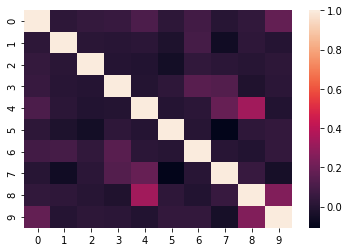

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [5]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


# Semantics

* BoW loses semantics - the *meaning* of the words and the sentences
* E.g. supervised learning model 'knows' that Jane Austen tends to use the word 'lady' it doesn't know what a lady is. Nothing in our work on NLP so far that would allow a model to say whether 'queen' or 'car' is more similar to 'lady.' 

Whithout semantics models are tripped up by:
* synonyms ('milady' and 'lady')
* discards subtle differences in connocations of words, concepts, ideas, emotions 

Usupervised Neural Networks among other techniques solve for this:
* Rather than us 'telling' the model how language works and what each sentence means, we can feed the model a corpus of text and have it 'learn' the rules by identifying recurring patterns within the corpus.  
* Then we can use the trained unsupervised model to understand new sentences as well.  

Restrictrions to Unsupervised Models: 
* limited by their corpus 

**Latent Semantic Analysis.** ?  


# Converting sentences to vectors

Consider the following sentences:

1. "The best Monty Python sketch is the one about the dead parrot,  I laughed so hard."
2. "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!"
3. "Chocolate is the best ice cream dessert topping, with a great taste."
4. "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing."
5. "I would rather put strawberries on my ice cream for dessert, they have the best taste."
6. "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."

**'document'**: refers to the individual text chunks we are working with. e.g. sentences, paragraphs, or whole text files

Note: a term-document matrix has words as rows and documents as columns.

* without giving penalty weighting to universally popular words, popular words would be used as a significant identifier for both classes and would bring up both topics everytime the word was introduced. 
 

# Quantifying documents: Collection and document frequencies

**'Document frequency' (DF)** counts how many sentences a word appears in.  
**'Collection frequency' (CF)** counts how often a word appears, total, over all sentences.  

# Penalizing Indiscriminate Words: Inverse Document Frequency

Weighting words that occur less often (like 'sketch' and 'dessert') to be more influential than words that occur a lot (like 'best').  

**Inverse Document Frequency (IDF) for each term (t)** 
1. Ratio of total documents (N) divided by Document frequency (df), 2. Take the log (base 2) of the ratio:

$$idf_t=log \dfrac N{df_t}$$


|           |df |cf| idf |
|-----------|---|---|
| Monty     | 2 | 2 | 1.585 |
| Python    | 3 | 3 | 1 |
| sketch    | 2 | 2 | 1.585 |
| laugh     | 3 | 3 | 1 |
| funny     | 2 | 4 | 1.585 |
| best      | 4 | 4 | .585 |
| ice cream | 3 | 3 | 1 |
| dessert   | 2 | 2 | 1.585 |
| taste     | 3 | 4 | 1 |

The idf weights tell the model to consider 'best' as less important than other terms.  

# Term-frequency weights
**Term Frequency (TF)** - how frequently a term appears within a single document. 
Create unique weights for each sentence that combines the term frequency with the inverse document frequency (idf):

$$tf-idf_{t,d}=(tf_{t,d})(idf_t)$$

Now the terms that appear multiple times in 1 document will be weighted more heavily than the in documents where it is used less freqently. This weight will also take into account how popular the word is. So if a popular word is used excessively it could still registers. 

The tf_idf score will be highest for a term that occurs a lot within a small number of sentences, and lowest for a word that occurs in most or all sentences.  

Now we can represent each sentence as a vector made up of the tf-idf scores for each word:

|           | 1 | 2 | 3 | 
|-----------|---|---|---|
| Monty     | 1.585 | 0 | 0 |
| Python    | 1 | 1 | 0 | 
| sketch    | 1.585| 1.585 | 0 | 
| laugh     | 1 | 1 | 0 | 
| funny     | 0 | 4.755 | 0 | 
| best      | .585 | .585 | .585 | 
| ice cream | 0 | 0 | 1 | 
| dessert   | 0 | 0 | 1.585 | 
| taste     | 0 | 0 | 1 |

#### tf-idf vectors translate human-readable language to computer-usable numeric form.  Some information is lost in translation
Possible decision-points include:

* Which stop words to include or exclude
* Should we use phrases ('Monty Python' instead of 'Monty' and 'Python') as terms
* The threshold for infrequent words: Here, we excluded words that only occurred once.  In longer documents, it may be a good idea to set a higher threshold.
* How many terms to keep.  We kept all the terms that fit our criteria (not a stop word, occurred more than once), but for bigger document collections or longer documents, this may create unfeasibly long vectors.  We may want to decide to only keep the 10,000 words with the highest collection frequency scores, for example.


# Vector Space Model

**Vector Space Model** - vector representation of the text.  
* Can be used to compute the similarity between our sentences and a new phrase or sentence- 
* This method is often used by search engines to match a query to possible results.  

Our sentences exist in an n-dimensional space where n is equal to the number of terms in our term-document matrix.  To compute the similarity of our sentences to a new sentence, we transform the new sentence into a vector and place it in the space.  We can then calculate how different the angles are for our original vectors and the new vector, and identify the vector whose angle is closest to the new vector.  

**Typically this is done by calculating the cosine of the angle between the vectors.**
* If the two vectors are identical, the angle between them will be 0° and the cosine will be 1.  
* If the two vectors are orthogonal, with an angle of 90°, the cosine will be 0.  

If we were running a search query, then, we would return sentences that were most similar to the query sentence, ordered from the highest similarity score (cosine) to the lowest.  Pretty handy!

Limitations:
* **synonyms** - since it treates each word as distinct from every other word it does not treat recognize similarity between synonyms
* **polysemy** - treats words that have different meanings in different contexts as the same



# Latent Semantic Analysis

Latent Semantic Analysis solves for the synonym/polysemy issues in tf-idf by reducing our tf-idf-weighted term-document matrix into a lower-dimensional space by combining the information from multiple terms into one new row/dimension

Latent Semantic Analysis/Latent Semantic Indexing - 
Applies PCA to tf-idf term-document matrix and returns clusters of terms that reflect a topic
* each document receives a score for each topic with higher scores indicating that the document is relevant to the topic
* documents may pertain to more than one topic

LSA advantages:
* handy for large corpuses
* situations where you don't know what topics characterize your documents
* useful way of creating features to be used in other models 
